In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

## Chargement des données

In [2]:
iris=pd.read_csv('./iris.txt', sep='\t', header=None)

In [3]:
X=iris.iloc[:,:-1].values
Y=iris.iloc[:, -1].values

In [4]:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 1/3, random_state = 1)

In [5]:
class Perc:
    def __init__(self, input_size=4):
        self.input_size = input_size
        self.weight = np.random.rand(1, input_size)

    def predict(self, x):
        return np.dot(self.weight, x)

    def reset(self):
        self.weight = np.random.rand(1, self.input_size)

In [6]:
P1 = Perc()
P2 = Perc()
P3 = Perc()

In [7]:
def predict(XDeTest):
    YPred1 = P1.predict(XDeTest)
    YPred2 = P2.predict(XDeTest)
    YPred3 = P3.predict(XDeTest)
    proba = np.array([YPred1, YPred2, YPred3])
    algo = proba.argmax()+1
    return algo

def predictAll(XALL):
    ret = np.zeros(len(XALL))
    for i in range(0, len(XALL)):
        ret[i] = predict(XALL[i])
    return ret


def fit(XdeTrain, YDeTrain, epochs=500, eta=0.1, reset=False):
    if reset:
        P1.reset()
        P2.reset()
        P3.reset()
    for epoch in range(0, epochs):
        for i in range(len(XdeTrain)):
            donneeX = XdeTrain[i]
            donneeY = YDeTrain[i]

            Y1 = P1.predict(donneeX)
            Y2 = P2.predict(donneeX)
            Y3 = P3.predict(donneeX)

            if donneeY == 1:
                if Y1 <=0 :
                    P1.weight += eta*donneeX
                if Y2 >= 0:
                    P2.weight -= eta*donneeX
                if Y3 >= 0:
                    P3.weight -= eta*donneeX

            if donneeY == 2:
                if Y2 <= 0:
                    P2.weight += eta*donneeX
                if Y1 >= 0:
                    P1.weight -= eta*donneeX
                if Y3 >= 0:
                    P3.weight -= eta*donneeX

            if donneeY == 3:
                if Y3 <= 0 :
                    P3.weight += eta*donneeX
                if Y2 >= 0:
                    P2.weight -= eta*donneeX
                if Y1 >= 0:
                    P1.weight -= eta*donneeX


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
def matrix(YPred, YTest):
    cm = confusion_matrix(YTest, YPred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print("Accuracy : " + str(accuracy_score(y_true=YTest, y_pred=YPred)))
    print("Precision 1 : " + str(precision_score(y_true=YTest, y_pred=YPred, average=None)[0]))
    print("Precision 2 : " + str(precision_score(y_true=YTest, y_pred=YPred, average=None)[1]))
    print("Precision 3 : " + str(precision_score(y_true=YTest, y_pred=YPred, average=None)[2]))
    print("Recall 1 : " + str(recall_score(y_true=YTest, y_pred=YPred, average=None)[0]))
    print("Recall 2 : " + str(recall_score(y_true=YTest, y_pred=YPred, average=None)[1]))
    print("Recall 3 : " + str(recall_score(y_true=YTest, y_pred=YPred, average=None)[2]))

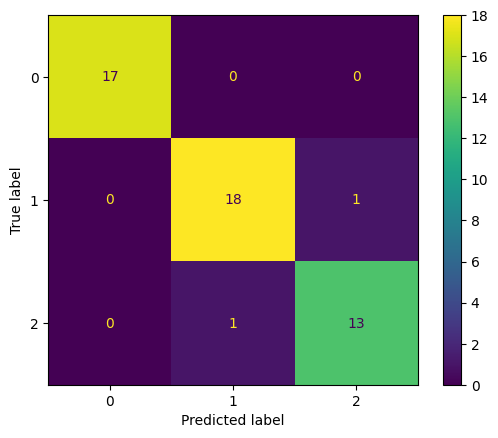

Accuracy : 0.96
Precision 1 : 1.0
Precision 2 : 0.9473684210526315
Precision 3 : 0.9285714285714286
Recall 1 : 1.0
Recall 2 : 0.9473684210526315
Recall 3 : 0.9285714285714286


In [9]:
fit(Xtrain, Ytrain, epochs=1000, eta=0.01, reset=True)
matrix(predictAll(Xtest), Ytest)

### Normalisation des données

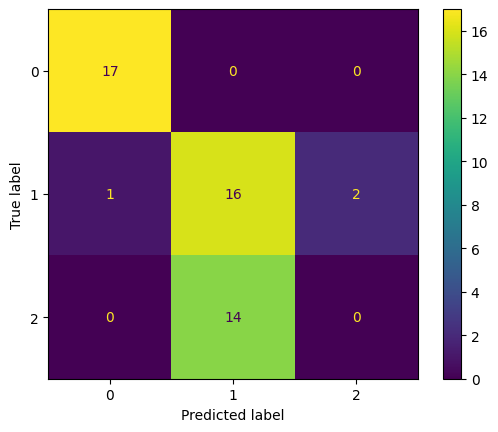

Accuracy : 0.66
Precision 1 : 0.9444444444444444
Precision 2 : 0.5333333333333333
Precision 3 : 0.0
Recall 1 : 1.0
Recall 2 : 0.8421052631578947
Recall 3 : 0.0


In [10]:
SS = StandardScaler()
SS.fit(Xtrain)
Xtrain_norm = SS.transform(Xtrain)
Xtest_norm = SS.transform(Xtest)

fit(Xtrain_norm, Ytrain, epochs=10, eta=0.0001, reset=True)
matrix(predictAll(Xtest_norm), Ytest)

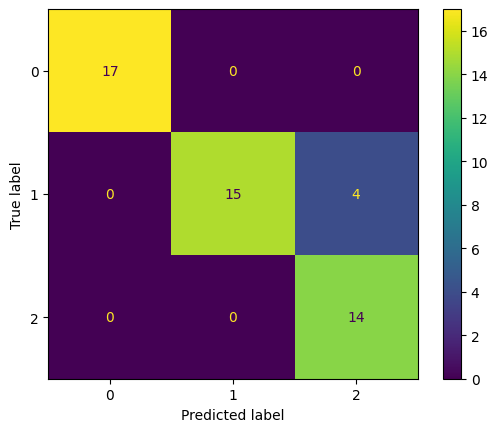

Accuracy : 0.92
Precision 1 : 1.0
Precision 2 : 1.0
Precision 3 : 0.7777777777777778
Recall 1 : 1.0
Recall 2 : 0.7894736842105263
Recall 3 : 1.0


In [11]:
MLP = MLPClassifier(random_state=1)
MLP.fit(Xtrain, Ytrain)
YMLP = MLP.predict(Xtest)
matrix(YMLP, Ytest)

# LSUN

In [12]:
lsun = pd.read_csv('./Lsun.txt', sep='\t', header=None)
Xlsun = lsun.iloc[:, :-1].values
Ylsun = lsun.iloc[:, -1].values

Xlsuntrain, Xlsuntest, Ylsuntrain, Ylsuntest = train_test_split(Xlsun, Ylsun, test_size=1 / 3, random_state=1)

In [13]:
#transformation
SS = StandardScaler()
SS.fit(Xlsuntrain)
Xsun_train_norm = SS.transform(Xlsuntrain)
Xsun_test_norm = SS.transform(Xlsuntest)

In [14]:
P1 = Perc(input_size=2)
P2 = Perc(input_size=2)
P3 = Perc(input_size=2)

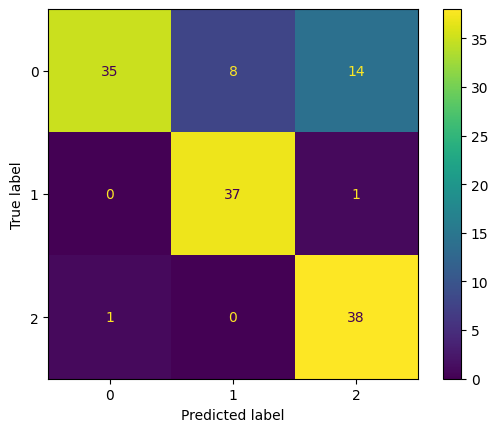

Accuracy : 0.8208955223880597
Precision 1 : 0.9722222222222222
Precision 2 : 0.8222222222222222
Precision 3 : 0.7169811320754716
Recall 1 : 0.6140350877192983
Recall 2 : 0.9736842105263158
Recall 3 : 0.9743589743589743


In [17]:
fit(Xlsuntrain, Ylsuntrain, epochs=500, eta=0.01, reset=True)
matrix(predictAll(Xlsuntest), Ylsuntest)